In [1]:
from qaoa_and_tdvp import QAOA, tdvp_optimize_qaoa, scipy_optimize, QAOAResult
from MaxCut import MaxCut
from benchmark import get_all_connected, get_connected_rn_graph, get_rn_qubo, select_if_connected, Benchmark
from qutip.parallel import parallel_map, serial_map
from itertools import combinations_with_replacement
from multiprocessing import Value

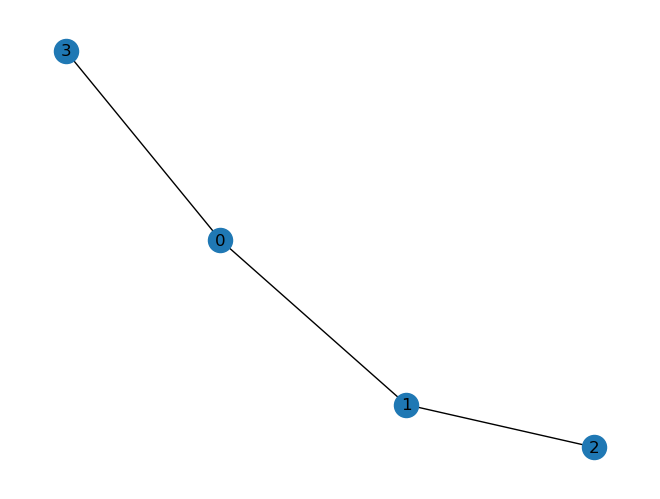

In [2]:
p = 2
n=4
instance = MaxCut(get_connected_rn_graph(n, 0.5))
qaoa = QAOA(qubo=instance.qubo, p=p)
delta = tuple(1 for _ in range(2 * qaoa.p))

res = tdvp_optimize_qaoa(
    qaoa,
    delta,
    1,
    int_mode="RK45",
    rhs_mode="qaoa",
    grad_tol=0.05,
    max_iter=300,
)
print(res)

In [3]:
qaoa.test_map()

10

In [4]:
qaoa.reset_gate_counter()
list(parallel_map(
            task=qaoa._Gij,
            values=[(0,0),(0,1)],  # all combinations of indices, including the diagonal
            task_args=(delta,),
        ))
qaoa.num_gates

1404